# PyTorch Workflow

Lets explorer an example PyTorch end-to-end workflow.

Resources:
* Ground Truth notebook : Github link
* Book version of notebook -
* Ask a question -



In [7]:
what_were_covering = {1: "data (prepared and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all togather"}

what_were_covering

{1: 'data (prepared and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all togather'}

In [8]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch version

torch.__version__

'2.3.0+cu121'

## Data (Praparing and Loading)

Data can be almost anything.... in machine learning
* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs and podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight with *known* **parameters** .

In [9]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step =0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Spliting Data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test with our data





In [12]:
# Create a train/test split

train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize"

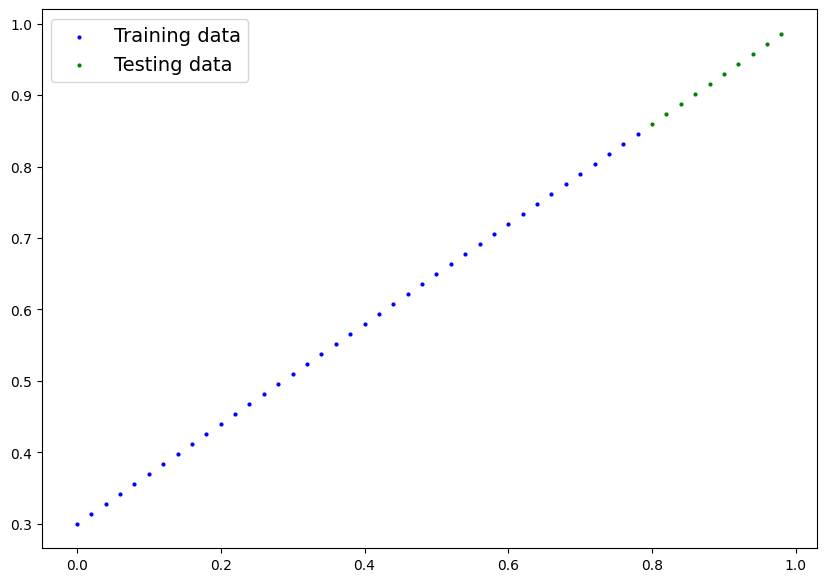

In [16]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?

  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


  # Show the legend
  plt.legend(prop={"size": 14})


plot_predictions()



## 2. Build Model

Our First PyTorch Model

This is very exciting.. lets do it!



What our model doeas:
* Start with random values (eight & bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How doeas it do so?

1. Gradient descent
2. Backpropogation



In [17]:
# Create a linear regression model class


class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch.float))

    # Forward method to define the computation in the model

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights*x +self.bias




### PyTorch Model building block essentials

* torch.nn - contains all of the buildings for computational graphs( a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module -  Base call for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this methid defines what happens in the forward computation


### Checking the contents of our PyTorch Model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [18]:
# Create a random seed

torch.manual_seed(42)

# Create an insatnce of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

# check out parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [19]:
# list named parameters


model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
weight, bias

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` and `X_test`

When we pass data through our model, its going to run through the forward() method.



In [20]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [21]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

#y_preds

# You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred

# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds


tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [ ]:
y_test

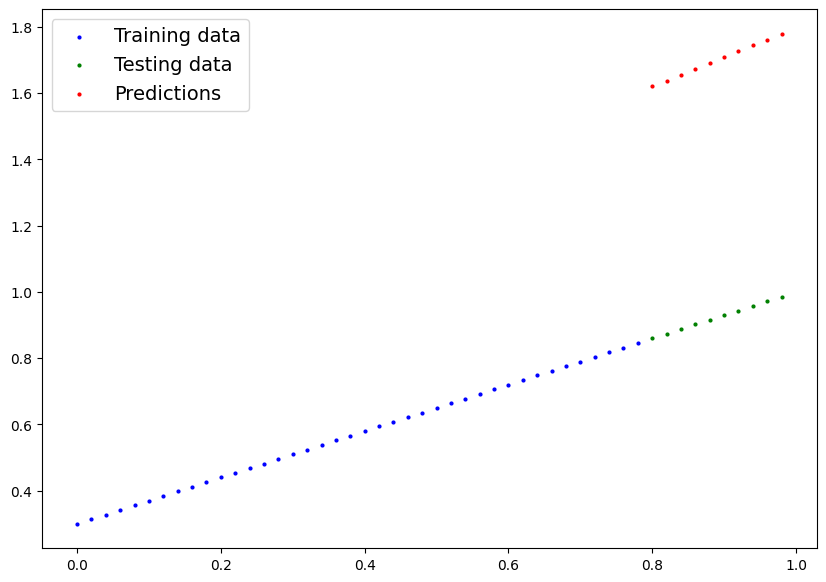

In [22]:
plot_predictions(predictions=y_preds)

## 3. Train the model

The whole idea of training is for a model to move from some unknown prarameters (these may be random ) to some known parameters

Or in other words from a poor reprensentation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are we use loss functions

* Note : Loss function may also be called cost function pr criterion in different areas. For our case, we're going to refer it as loss function

Things we need to train:

* **Loss function:** A function to measure how worng your model's predictions are to the ideal outputs

* **Oprimizer:** Takes into account the loss of a model and adjusts the models parameters(e.g. weight & bias in our case) to improve the loass function. https://pytorch.org/docs/stable/optim.html

** Indise the optimizer you'll often have to set two parameters:
*params - the model parameters you'd like to optimize for example params=model_0.parameters()
* lr(learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each stem (a small lr result in small changes , a large lr result in large changes)

And specifically for PyTorch, we need:

* A trianing loop
* A testing loop







In [23]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [25]:
# Setup a loass function

loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate



### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` function) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass prediction to the ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropogation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)



In [26]:
with torch.no_grad():
  list(model_0.parameters())

In [27]:
#Building a training loop in PyTorch

torch.manual_seed(42)

# an epoch is one loop through data... (This is hyperparameter because we've set it)
epochs = 90

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data

for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss= loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropogation
  loss.backward()

  # 5. Step to optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumilate through the loop so.. we have to zero them above in step 3

  ### Tesing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (drop out layers / batch norms)
  with torch.inference_mode():

    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss : {loss} | Test loss: {test_loss}")

  # Print out model state dict()
  print(model_0.state_dict())


Epoch: 0 | Loss : 0.6860889196395874 | Test loss: 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
OrderedDict([('weights', tensor([0.8745])), ('bias', tensor([0.8950]))])
OrderedDict([('weights', tensor([0.8706])), ('bias', tensor([0.8850]))])
OrderedDict([('weights', tensor([0.8667])), ('bias', tensor([0.8750]))])
OrderedDict([('weights', tensor([0.8628])), ('bias', tensor([0.8650]))])
OrderedDict([('weights', tensor([0.8589])), ('bias', tensor([0.8550]))])
OrderedDict([('weights', tensor([0.8550])), ('bias', tensor([0.8450]))])
OrderedDict([('weights', tensor([0.8511])), ('bias', tensor([0.8350]))])
OrderedDict([('weights', tensor([0.8472])), ('bias', tensor([0.8250]))])
OrderedDict([('weights', tensor([0.8433])), ('bias', tensor([0.8150]))])
Epoch: 10 | Loss : 0.5708791017532349 | Test loss: 0.6290428042411804
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
OrderedDict([('weights', tensor([0.8355])), ('bias', tenso

In [28]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

  print(model_0.state_dict())


epoch_count, loss_values, test_loss_values

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])


([0, 10, 20, 30, 40, 50, 60, 70, 80],
 [tensor(0.6861, grad_fn=<MeanBackward0>),
  tensor(0.5709, grad_fn=<MeanBackward0>),
  tensor(0.4557, grad_fn=<MeanBackward0>),
  tensor(0.3405, grad_fn=<MeanBackward0>),
  tensor(0.2252, grad_fn=<MeanBackward0>),
  tensor(0.1100, grad_fn=<MeanBackward0>),
  tensor(0.0097, grad_fn=<MeanBackward0>),
  tensor(0.0062, grad_fn=<MeanBackward0>),
  tensor(0.0028, grad_fn=<MeanBackward0>)],
 [tensor(0.7638),
  tensor(0.6290),
  tensor(0.4943),
  tensor(0.3596),
  tensor(0.2249),
  tensor(0.0902),
  tensor(0.0210),
  tensor(0.0141),
  tensor(0.0058)])

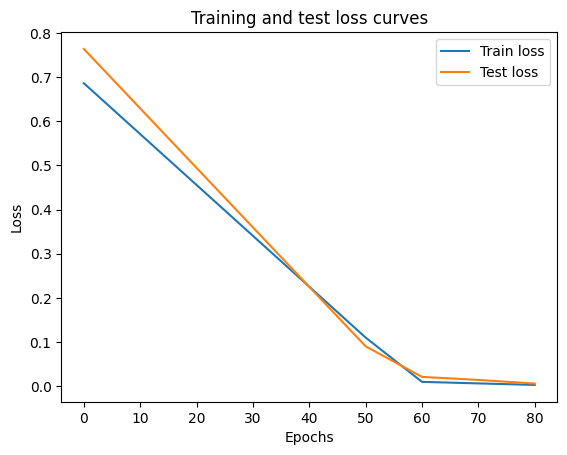

In [29]:
# Plot the loss curve

import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [30]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

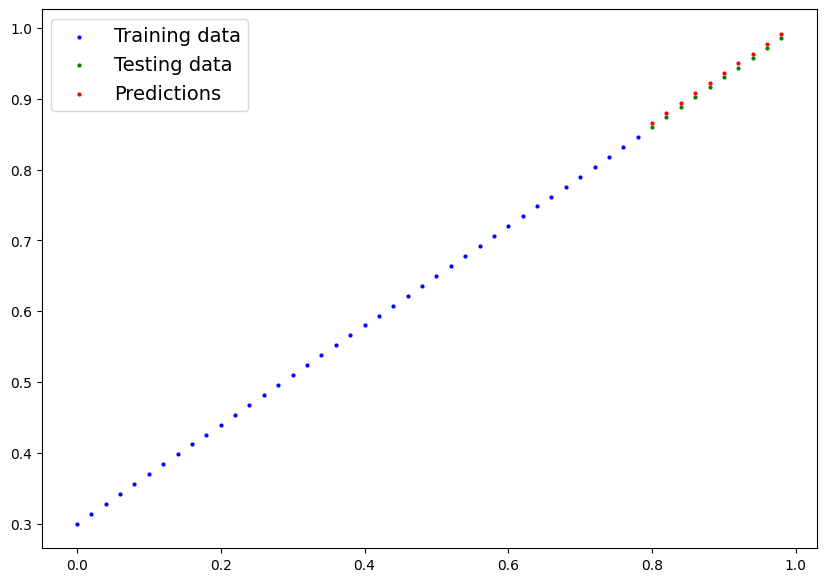

In [31]:
plot_predictions(predictions=y_preds_new)

### Saving a Model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

PyTorch save and load code : https://pytorch.org/tutorials/beginner/saving_loading_models.html



In [32]:
# Saving a PyTorch Model

from pathlib import Path

# 1. Create Models Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model static dict

print(f"Saving model to:  {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to:  models/01_pytorch_workflow_model_0.pth


In [33]:
ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jun 27 10:51 01_pytorch_workflow_model_0.pth


## Loading a PyTorch Model

Since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and load the saved state_dict() into that.


In [34]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [35]:
# To load in a saved static_dict we have to instantiate a new isntance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved static _dict of model_0 (this will update the new instance with updated parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [36]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [38]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [39]:
# Make some models preds

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [40]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all togather

Let's go back through the steps above and see it all in one place

In [41]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu121'

 Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).
If no GPU is available, the code will default to use CPU.



In [42]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


## Data

In [43]:
# Create some data using the linear regression formula of y = weight*x + bias

weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02


# Cerate X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [44]:
# Split data

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [45]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?

  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


  # Show the legend
  plt.legend(prop={"size": 14})

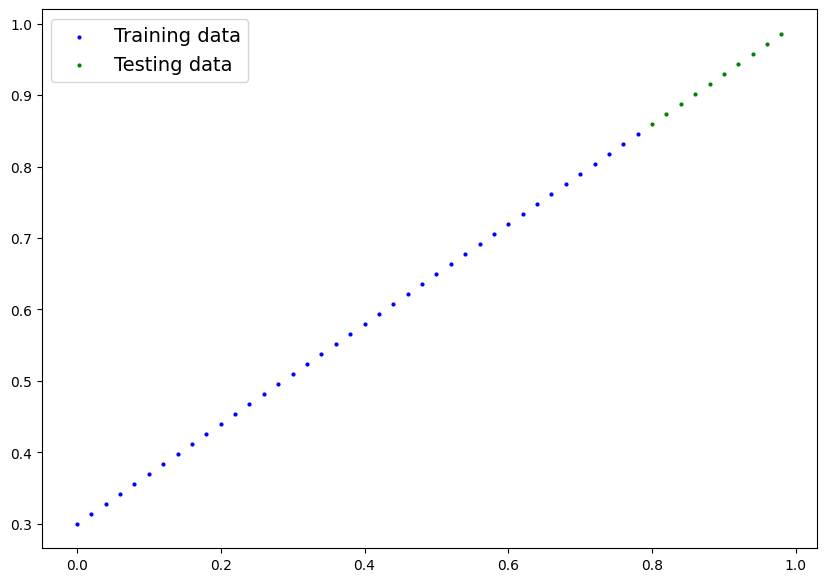

In [46]:
plot_predictions(X_train, y_train, X_test, y_test)

## Building a PyTorch Linear Model

In [48]:
# Create a Linear Model by sub classing nn.Module

class LinearRegressionModelV2(nn.Module): # almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer,
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed

torch.manual_seed(42)

model_1 = LinearRegressionModelV2()

model_1, model_1.state_dict()



(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [49]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [50]:
# Set the model to use the target device

model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.2 Training

For Training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [51]:
# Setup loss function

loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)


In [52]:
# Lets write a training loop

torch.manual_seed(42)

epochs= 200

# Put data on target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropogation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out whats happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")






Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [ ]:
model_1.state_dict()

In [ ]:
weight, bias

### Making and evaluating predictions

In [53]:
# Turn model into avaluation mode
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [54]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]], device='cuda:0')

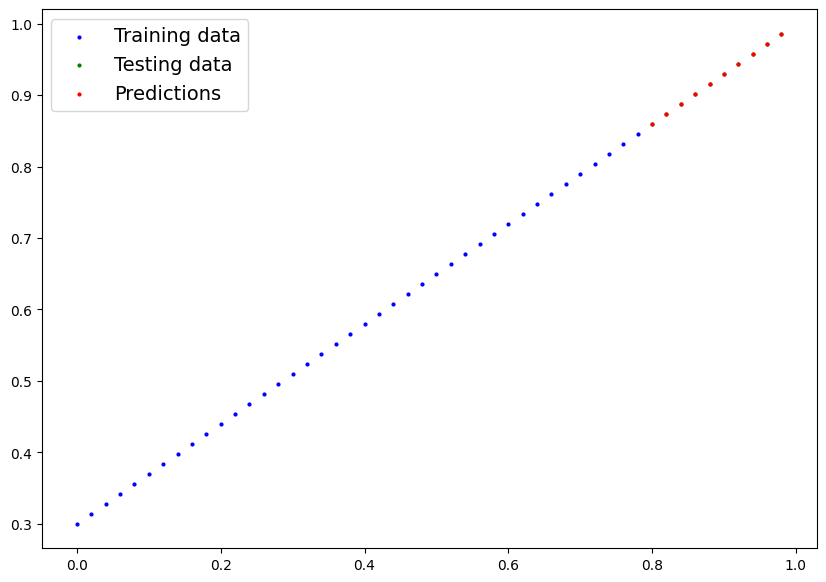

In [55]:
# Check out our model predictions visually

plot_predictions(predictions=y_preds.cpu())

### Saving and loading training model

In [60]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to models/01_pytorch_workflow_model_1.pth


In [61]:
# Load a PyTorch

# Create an instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device

loaded_model_1.to(device)




LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [62]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [63]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [65]:
# Evaluate loaded model

loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds==loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')